# Classifier Evaluation Lab

* Copy&paste your model for homework5 model
* Add grid search and train
* Compare performance
* Which one is better? Explain?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


In [3]:
# Creating numerical and categorical variabble

numerical_vars = ['age','commuting_distance', 'satisfaction_with_environment', 'last_raise_pct', 'last_performance_rating',
       'total_years_working', 'years_at_company', 'years_in_current_job',
       'years_since_last_promotion', 'years_with_current_supervisor']

categorical_Vars = [col for col in df.columns if col not in ['left_company'] + numerical_vars]


In [4]:
print(f"Numerical Variables: \n {numerical_vars}")
print()
print(f"Categorical Variables: \n {categorical_Vars}")

Numerical Variables: 
 ['age', 'commuting_distance', 'satisfaction_with_environment', 'last_raise_pct', 'last_performance_rating', 'total_years_working', 'years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']

Categorical Variables: 
 ['frequency_of_travel', 'department', 'education', 'gender', 'seniority_level', 'position', 'satisfaction_with_job', 'married_or_single']


<AxesSubplot:>

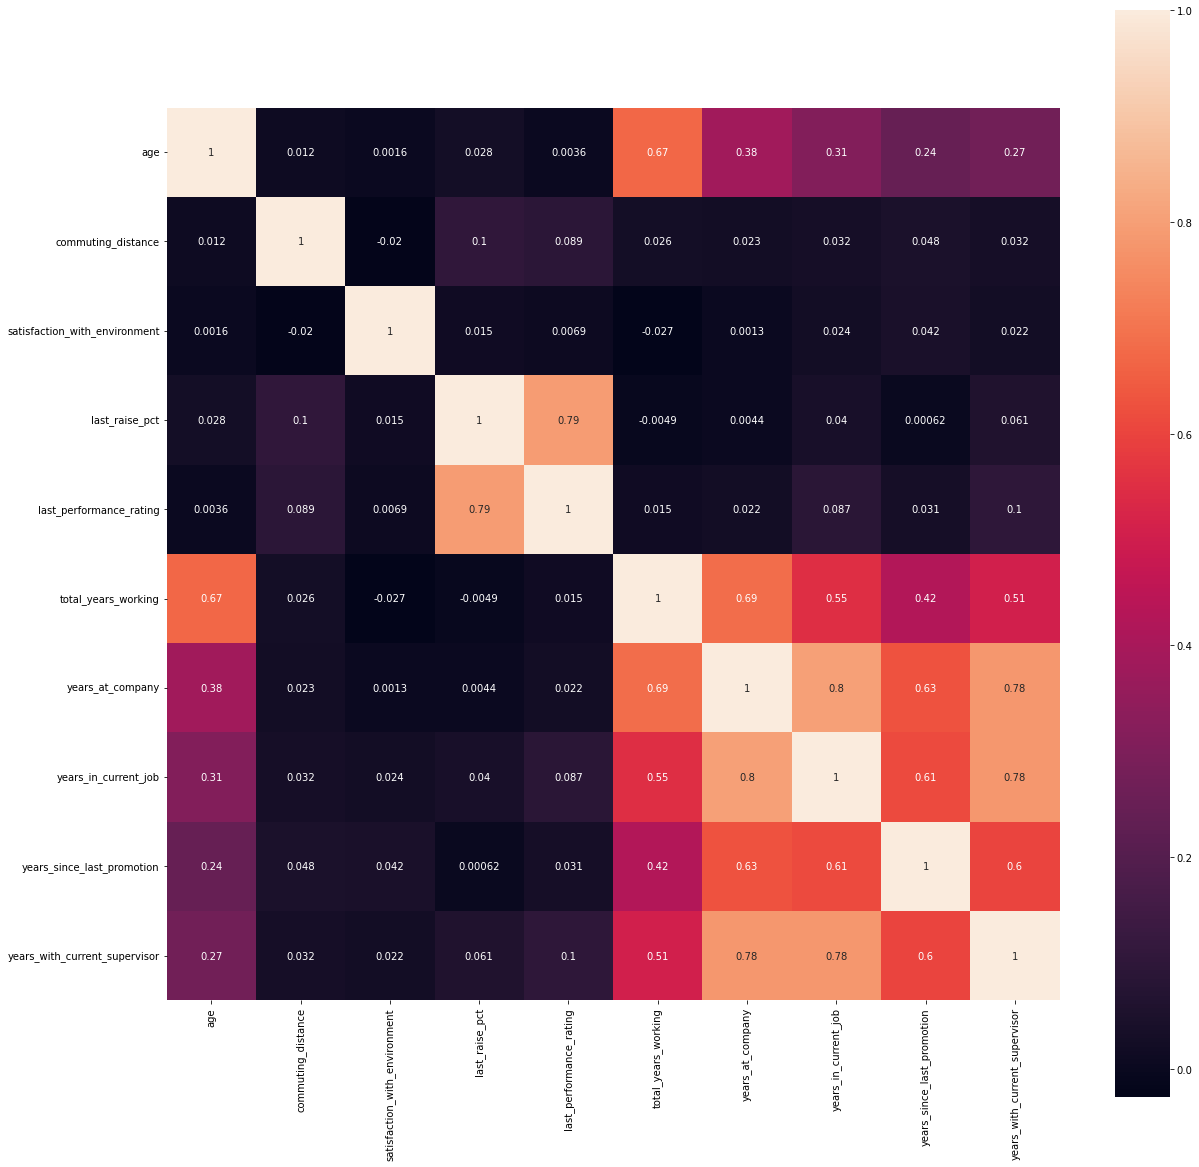

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df[numerical_vars].corr()

plt.figure(figsize = (20, 20))
sns.heatmap(data = corr, square=True, annot = True)

In [11]:
#Importing necessary libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

import matplotlib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge


In [12]:
features = [x for x in df.columns if x != 'left_company'] # Creating a features list

X = df[features]
y = df['left_company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124) # train test split

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 800
Records in test data: 200

Features:
age
frequency_of_travel
department
commuting_distance
education
satisfaction_with_environment
gender
seniority_level
position
satisfaction_with_job
married_or_single
last_raise_pct
last_performance_rating
total_years_working
years_at_company
years_in_current_job
years_since_last_promotion
years_with_current_supervisor


In [13]:
# num pipeline
num_pipeline = Pipeline( [('imputer missing', SimpleImputer(strategy='median')),
                         ('standardize', StandardScaler())])

# cat pipeline
cat_pipeline = Pipeline([('imputer missing', SimpleImputer(strategy='most_frequent')),
                         ('one hot encoding', OneHotEncoder( drop = 'first'))])

# combining pipelines
ct = ColumnTransformer(transformers=[('num_features', num_pipeline, numerical_vars), 
                                     ('cat_features', cat_pipeline, categorical_Vars)])
data = ct.fit_transform(X_train)

In [14]:
data.shape

(800, 36)

In [15]:
# procesing_pipeline
procesing_pipeline = ColumnTransformer(transformers=[('num_features', num_pipeline, numerical_vars),
                                                    ('cat_features', cat_pipeline, categorical_Vars),])

# modelling pipeline
modeling_pipeline = Pipeline([('data_preprocessing', procesing_pipeline),
                             ('Model', LogisticRegression())])

modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('num_features',
                                                  Pipeline(steps=[('imputer '
                                                                   'missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'satisfaction_with_environment',
                                                   'last_raise_pct',
                                                   'last_performance_rating',
                                                   'total_years_working',
                                                   'years_at_company',
           

In [16]:
# Predicting on training set

training_preds = modeling_pipeline.predict(X_train)

print('Accuracy is: ')
accuracy_score(training_preds, y_train)

Accuracy is: 


0.74875

In [17]:
# Predicting on test set

testing_preds = modeling_pipeline.predict(X_test)

print('Accuracy is: ')
accuracy_score(testing_preds, y_test)

Accuracy is: 


0.715

In [20]:
#Adding grid search and train
from sklearn.model_selection import GridSearchCV

In [ ]:
# modelling pipeline 
modeling_pipeline = Pipeline([('data_preprocessing', procesing_pipeline),
                             ('Model', LogisticRegression())])

modeling_pipeline.fit(X_train, y_train)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

lg_pipe = modeling_pipeline = Pipeline([
    ('data_preprocessing', procesing_pipeline),
        ('scaler', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('logreg', LogisticRegression(penalty='l2', solver='liblinear'))
        ]
    )


from sklearn.model_selection import GridSearchCV

param_grid = [
  {
    'logreg__C': [1, 10, 100, 1000], 
    'pca__n_components': [1,2,3,4,5,10,15]
  }
 ]

gcv_results = GridSearchCV(estimator=lg_pipe, param_grid=param_grid, scoring='accuracy')
gcv_results = gcv_results.fit(X_train, y_train)

In [30]:
gcv_results.best_score_

0.6849999999999999

3.comparing performance :

Predicting on training set Accuracy is: 0.74875
Predicting on test set Accuracy is: 0.715
gcv_results.best_score_ 0.6849999999999999



4.Which one is better?

Overall, the model appears to perform reasonably well on both the training and test sets, with slightly better performance on the training set. 


The model's accuracy on the training set is 0.74875, which means that the model correctly predicted 74.875% of the samples in the training set.
The model's accuracy on the test set is 0.715, which means that the model correctly predicted 71.5% of the samples in the test set.
The gcv_results.best_score_ value of 0.6849999999999999 indicates the best cross-validated score achieved during the grid search. 